# Problem 1
In this problem, I modified the chi_square_fit for Quadratic $y=Ax^2$, for use for CO2 Data.

This was done by transforming $y=Ax^2$ into $log(y)=log(A)+Nlog(x)$ in the begining of the chi_square_fit function, and then runing the rest of the function as usual.

Also includes an edited function for loading in the CO2 data from a txt file.


In [1]:
import numpy as np
import math
from P1 import chi_square_fit
from matplotlib import pyplot as plt 
from read_co2 import read_co2

Below is a function to assist with creating a line out of just a slope and intercept.

In [2]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    return(x_vals, y_vals)

Below I read in the data from the CO2.txt file,  and run the modified chi_square_fit function from P1.py.

In [3]:
dates,data,err = read_co2("CO2.txt")

In [4]:
z = chi_square_fit(dates,data,err)

Below, I convert the original data into an equivilant form using the equation $log(y)=log(A)+Nlog(x)$ to linearize it.  Next, the output from chi_square_fit is plotted with this linearized direct data.

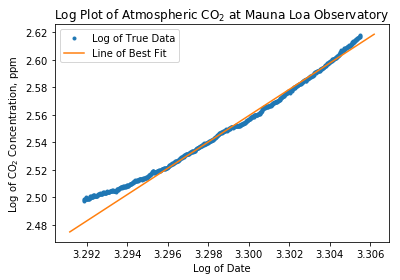

In [5]:
def f(g):
    return math.log(g,10)
def h(yi,j):
    return math.sqrt(1/(yi*math.log(10)))*j
    
f1 = np.vectorize(f)
f2 = np.vectorize(f)
h1 = np.vectorize(h)
    
lineDates = f1(dates)
lineData = f2(data)

plt.plot(lineDates,lineData, '.',  label='Log of True Data')
xLine, yLine = abline(z[1],z[0])
plt.plot(xLine,yLine, label = 'Line of Best Fit')

plt.title(r"Log Plot of Atmospheric CO$_{2}$ at Mauna Loa Observatory")
plt.xlabel("Log of Date")
plt.ylabel(r"Log of CO$_{2}$ Concentration, ppm")
plt.legend()


plt.show()


Below is the above plots, but also shown is a line demostrating when the atmosphere will become unbreathable due to CO2 levels being above 50,000 Parts Per Million.

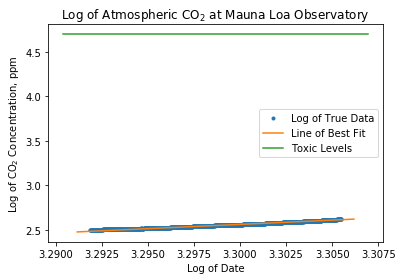

In [6]:
plt.plot(lineDates,lineData, '.',  label='Log of True Data')
xLine, yLine = abline(z[1],z[0])
plt.plot(xLine,yLine, label = 'Line of Best Fit')

xToxic, yToxic = abline(0,math.log(50000,10))
plt.plot(xToxic,yToxic, label = 'Toxic Levels')

plt.title(r"Log of Atmospheric CO$_{2}$ at Mauna Loa Observatory")
plt.xlabel("Log of Date")
plt.ylabel(r"Log of CO$_{2}$ Concentration, ppm")
plt.legend()


plt.show()

Below is the intersection point of the Toxic line with the Best Fit line, and the date this will occur:

In [7]:
xi = (math.log(50000,10)-z[0]) / (z[1]-0)
yi = z[1] * xi + z[0]

Point = 10**xi

print(Point)

3335.8198967814374


In the year 3335, the air will be unbreathable due to CO2.